# **Assignment 04: Neural Networks**

# Part 2: CNN model on the Food 101 image dataset
Data source: https://www.kaggle.com/datasets/kmader/food41

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report

%matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

In [6]:
data_dir = "C:\\Users\\aksha\\Downloads\\archive\\images"

In [7]:
data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 101000 files belonging to 101 classes.


In [8]:
# Creating an ImageDataGenerator and doing Image Augmentation
datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split = 0.2)

In [9]:
height = 228
width = 228
channels = 3
batch_size = 32
img_shape = (height, width, channels)
img_size = (height, width)

In [10]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size = img_size,
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [11]:
## bonus code
# function showing the image
import matplotlib.pyplot as plt

def show_img(data):
    plt.figure(figsize=(15,15))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")

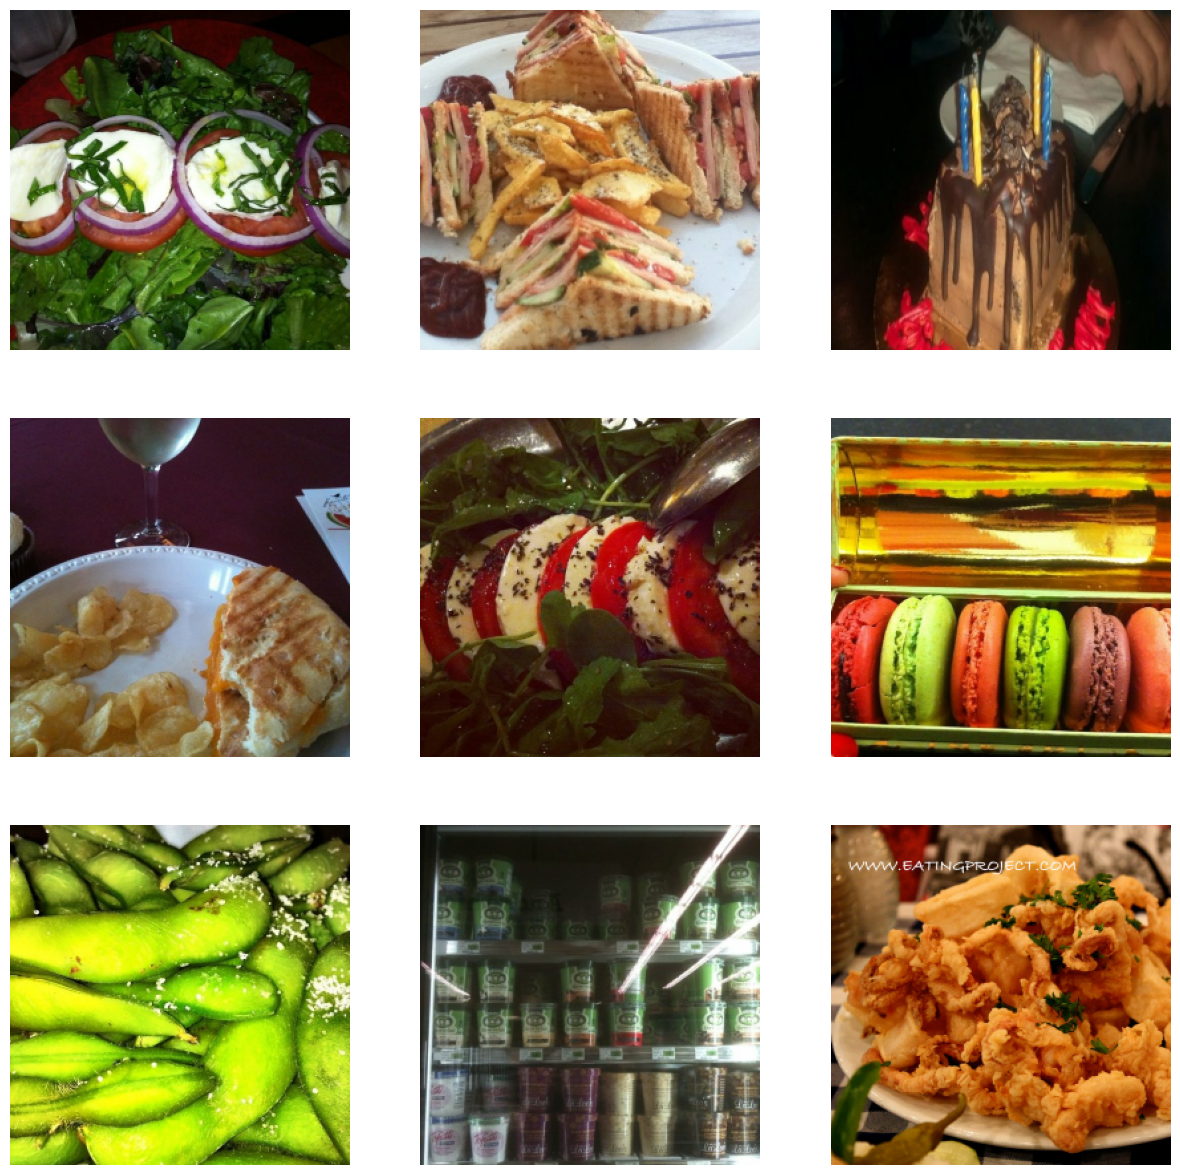

In [12]:
show_img(data)

### Creating the convolutional base

In [18]:
input_shape = (228, 228, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False # freeze base model layers

model = models.Sequential()
model.add(layers.Conv2D(8,(3, 3), activation='relu', input_shape=(228, 228, 3)))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(8, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(101, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 226, 226, 8)       224       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 113, 113, 8)      0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 102152)            0         
                                                                 
 dense_2 (Dense)             (None, 101)               10317453  
                                                                 
Total params: 10,317,677
Trainable params: 10,317,677
Non-trainable params: 0
_________________________________________________________________


### Unrolling the 3D output to 1D

In [20]:
# model.add(layers.Flatten())
# model.add(layers.Dense(150, activation='relu'))
# model.add(layers.Dense(20, activation='softmax'))
####Steps to "Flatten" is incoporated in the previos step####

In [21]:
# model.summary()
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3699872526332226486
xla_global_id: -1
]


### Compiling and training the model

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, epochs=2, 
                    validation_data=val_data)

Epoch 1/2
2525/2525 [==============================] - 2753s 1s/step - loss: 5.0139 - accuracy: 0.0338 - val_loss: 4.4281 - val_accuracy: 0.0518
Epoch 2/2
2525/2525 [==============================] - 2490s 986ms/step - loss: 4.3849 - accuracy: 0.0542 - val_loss: 4.3395 - val_accuracy: 0.0584


In [ ]:
#####Attempted creating the visualization, but it was taking extremely long to render#####
# plt.plot(history.history['accuracy'], label='training accuracy')
# plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.9, 1])
# plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(train_data, verbose=2)

Conclusion: The accuracy of the model is low (~5%). There is scope to experiment with the steps to improve the accuracy of the model. Running two epochs took more than 1 hour, it was hence decided to end the project here for now.  